In [6]:
import networkx as nx
import re
import gensim
import logging
import pandas as pd
import urllib.request
from gensim.models import word2vec

In [7]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

NameError: name 'smart' is not defined

In [11]:
word = 'вино_S'
if word in model:
    print(word)
else:
    print('not found')

вино_S


In [90]:
d1 = {}
for i in model.most_similar(positive=[word]):
    if (i[1] >= 0.5) and (i[0][-2:] == '_S'):
        d1[i[0]] = i[1]
print(d1)

{'водка_S': 0.6472468376159668, 'алкоголь_S': 0.6356332302093506, 'пиво_S': 0.6036792397499084, 'самогон_S': 0.5737318992614746, 'вино_S': 0.5369029641151428, 'самогонка_S': 0.5191596150398254, 'коньяк_S': 0.5159386396408081, 'абсент_S': 0.5072966814041138, 'спирт_S': 0.5066832900047302, 'напиток_S': 0.5041528344154358}


In [91]:
d2 = {}
for key in list(d1.keys()):
    d2[key] = {}
    for i in model.most_similar(positive=[key]):
        if (i[1] >= 0.5) and (i[0][-2:] == '_S') and (i[0][:-2] != 'вино'):
            d2[key][i[0]] = i[1]

print(d2)

{'водка_S': {'коньяк_S': 0.8468217849731445, 'пиво_S': 0.829713761806488, 'самогон_S': 0.7824377417564392, 'портвейн_S': 0.7768006324768066, 'шампанское_S': 0.7401661276817322, 'чача_S': 0.7299690246582031, 'самогонка_S': 0.7204016447067261, 'лимонад_S': 0.7022958993911743, 'минералка_S': 0.6864304542541504}, 'алкоголь_S': {'спиртное_S': 0.6356331706047058, 'никотин_S': 0.5666631460189819, 'наркотик_S': 0.5567535161972046, 'курение_S': 0.5467016696929932, 'кофеин_S': 0.5025952458381653, 'спирт_S': 0.5022205114364624}, 'пиво_S': {'водка_S': 0.829713761806488, 'коньяк_S': 0.7656537294387817, 'портвейн_S': 0.7458111047744751, 'шампанское_S': 0.7391636371612549, 'лимонад_S': 0.7168172597885132, 'чача_S': 0.7167270183563232, 'самогон_S': 0.7148751616477966, 'кока-кола_S': 0.7138543725013733, 'минералка_S': 0.688491702079773}, 'самогон_S': {'водка_S': 0.7824377417564392, 'самогонка_S': 0.7669643759727478, 'пиво_S': 0.7148751616477966, 'чача_S': 0.6587560176849365, 'портвейн_S': 0.63009613752

In [104]:
G = nx.Graph()
G.add_node('вино_S')
for key in d1.keys():
    G.add_node(key, label = key[:-2])
for key in d2.keys():
    for word in d2[key].keys():
        for node in list(G.nodes()):
            if word != node:
                G.add_node(word, label = word[:-2])
print(G.nodes())

['вино_S', 'водка_S', 'алкоголь_S', 'пиво_S', 'самогон_S', 'самогонка_S', 'коньяк_S', 'абсент_S', 'спирт_S', 'напиток_S', 'портвейн_S', 'шампанское_S', 'чача_S', 'лимонад_S', 'минералка_S', 'спиртное_S', 'никотин_S', 'наркотик_S', 'курение_S', 'кофеин_S', 'кока-кола_S', 'рябиновка_S', 'кагор_S', 'ликер_S', 'водяра_S', 'зубровка_S', 'бренди_S', 'вермут_S', 'текила_S', 'бензин_S', 'денатурат_S', 'формалин_S', 'уксус_S', 'ректификат_S', 'коктейль_S']


In [105]:
for key, value in d1.items():
    G.add_edge('вино_S', key, weight = value)
for word in d2.keys():
    for key, value in d2[word].items():
        for edge in list(G.edges()):
            if (key, word) != edge:
                G.add_edge(word, key, weight = value)

print(G.edges())

[('вино_S', 'водка_S'), ('вино_S', 'алкоголь_S'), ('вино_S', 'пиво_S'), ('вино_S', 'самогон_S'), ('вино_S', 'вино_S'), ('вино_S', 'самогонка_S'), ('вино_S', 'коньяк_S'), ('вино_S', 'абсент_S'), ('вино_S', 'спирт_S'), ('вино_S', 'напиток_S'), ('вино_S', 'шампанское_S'), ('вино_S', 'портвейн_S'), ('вино_S', 'кагор_S'), ('вино_S', 'чача_S'), ('вино_S', 'ликер_S'), ('водка_S', 'коньяк_S'), ('водка_S', 'пиво_S'), ('водка_S', 'самогон_S'), ('водка_S', 'портвейн_S'), ('водка_S', 'шампанское_S'), ('водка_S', 'чача_S'), ('водка_S', 'самогонка_S'), ('водка_S', 'лимонад_S'), ('водка_S', 'минералка_S'), ('водка_S', 'абсент_S'), ('водка_S', 'спирт_S'), ('водка_S', 'напиток_S'), ('алкоголь_S', 'спиртное_S'), ('алкоголь_S', 'никотин_S'), ('алкоголь_S', 'наркотик_S'), ('алкоголь_S', 'курение_S'), ('алкоголь_S', 'кофеин_S'), ('алкоголь_S', 'спирт_S'), ('пиво_S', 'коньяк_S'), ('пиво_S', 'портвейн_S'), ('пиво_S', 'шампанское_S'), ('пиво_S', 'лимонад_S'), ('пиво_S', 'чача_S'), ('пиво_S', 'самогон_S'), ('п

In [131]:
print(nx.degree_centrality(G))
print(nx.eigenvector_centrality(G))
print(nx.closeness_centrality(G))
print(nx.betweenness_centrality(G))

['абсент_S',
 'алкоголь_S',
 'бензин_S',
 'бренди_S',
 'вермут_S',
 'вино_S',
 'водка_S',
 'водяра_S',
 'денатурат_S',
 'зубровка_S',
 'кагор_S',
 'кока-кола_S',
 'коктейль_S',
 'коньяк_S',
 'кофеин_S',
 'курение_S',
 'ликер_S',
 'лимонад_S',
 'минералка_S',
 'напиток_S',
 'наркотик_S',
 'никотин_S',
 'пиво_S',
 'портвейн_S',
 'ректификат_S',
 'рябиновка_S',
 'самогон_S',
 'самогонка_S',
 'спирт_S',
 'спиртное_S',
 'текила_S',
 'уксус_S',
 'формалин_S',
 'чача_S',
 'шампанское_S']

In [107]:
#Радиус графа
print(nx.radius(G))

#Диаметр графа
print(nx.diameter(G))

#Коэффициент ассортативности
print(nx.degree_pearson_correlation_coefficient(G))

#Плотность графа
print(nx.density(G))

#Коэффициент кластеризации
print(nx.average_clustering(G))
print(nx.transitivity(G))

2
4
-0.201321939402237
0.13277310924369748
0.31741908884766035
0.463768115942029


In [112]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))
#получилось три сообщества:
#виды алкольных напитков;
#вещества, вызывающие привыкание;
#технические и химические жидкости

[['абсент_S',
  'бренди_S',
  'вермут_S',
  'вино_S',
  'водка_S',
  'водяра_S',
  'зубровка_S',
  'кагор_S',
  'кока-кола_S',
  'коктейль_S',
  'коньяк_S',
  'ликер_S',
  'лимонад_S',
  'минералка_S',
  'напиток_S',
  'пиво_S',
  'портвейн_S',
  'рябиновка_S',
  'самогон_S',
  'самогонка_S',
  'спиртное_S',
  'текила_S',
  'чача_S',
  'шампанское_S'],
 ['алкоголь_S', 'кофеин_S', 'курение_S', 'наркотик_S', 'никотин_S'],
 ['бензин_S',
  'денатурат_S',
  'ректификат_S',
  'спирт_S',
  'уксус_S',
  'формалин_S']]

In [119]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))
#получилось три сообщества:
#виды алкольных напитков;
#вещества, вызывающие привыкание;
#технические и химические жидкости

[['абсент_S',
  'бренди_S',
  'вермут_S',
  'вино_S',
  'водка_S',
  'водяра_S',
  'зубровка_S',
  'кагор_S',
  'кока-кола_S',
  'коктейль_S',
  'коньяк_S',
  'ликер_S',
  'лимонад_S',
  'минералка_S',
  'напиток_S',
  'пиво_S',
  'портвейн_S',
  'рябиновка_S',
  'самогон_S',
  'самогонка_S',
  'спиртное_S',
  'текила_S',
  'чача_S',
  'шампанское_S'],
 ['алкоголь_S', 'кофеин_S', 'курение_S', 'наркотик_S', 'никотин_S'],
 ['бензин_S',
  'денатурат_S',
  'ректификат_S',
  'спирт_S',
  'уксус_S',
  'формалин_S']]

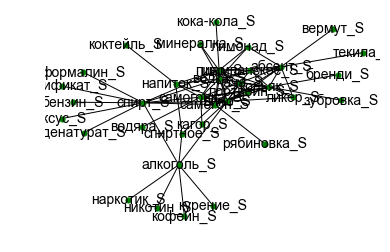

In [138]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

pos=nx.spring_layout(G)

g1 = list(next_level_communities[0])
g2 = list(next_level_communities[1])

nx.draw_networkx_nodes(G, pos, node_color='green', node_size=30)
nx.draw_networkx_edges(G, pos, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='Arial')
plt.axis('off')
plt.show()

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
